In [1]:
from maelzel.core import *


In [2]:
import maelzel.partialtracking as pt
import maelzel.transcribe.spectral as trsp
from maelzel.snd.audiosample import Sample
%matplotlib qt

QSocketNotifier: Can only be used with threads started with QThread


Sample(dur=4.0, sr=48000, ch=1)
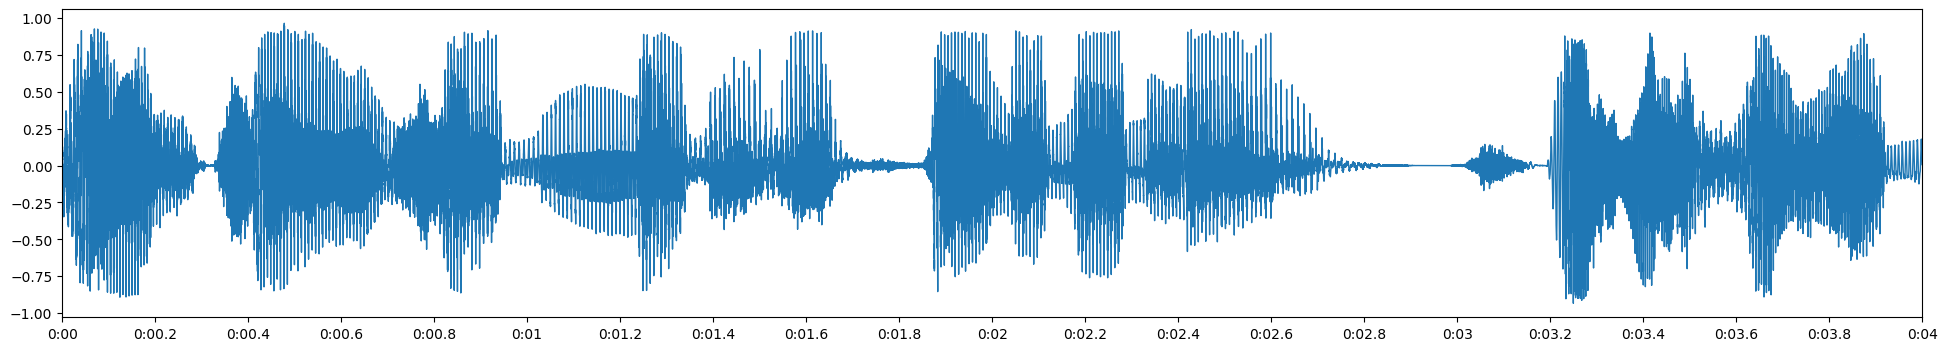

In [3]:
samp = Sample("/home/em/Lib/snd/samples/speech/voiceover-fragment.flac")[:4]
samp

In [4]:
s = pt.Spectrum.analyze(samp.samples, sr=samp.sr, resolution=60, windowsize=100, hoptime=1/(100*4), freqdrift=40, minbreakpoints=1)
s

Spectrum(numpartials=16574, start=0.008, end=3.999)

In [5]:
s.plot()

In [15]:
s.play(gaussian=True, bwscale=0.5, chan=1.5, freqscale=1, speed=0.5)

Button(description='Stop', style=ButtonStyle())

Output()

Synth(𝍪 .playPartials=501.001 start=181.075 dur=-1.000 p4=104 ifn=0 iskip=2669 inumrows=865 inumcols=0.5 kspeed=0 kloop=0 kminfreq=0 kmaxfreq=7 iflags=0 istart=0 istop=1 kfreqscale=1 ichan=0.5 kbwscale=1 kgain=0.5)

Sample(dur=3.9985260770975057, sr=44100, ch=1)
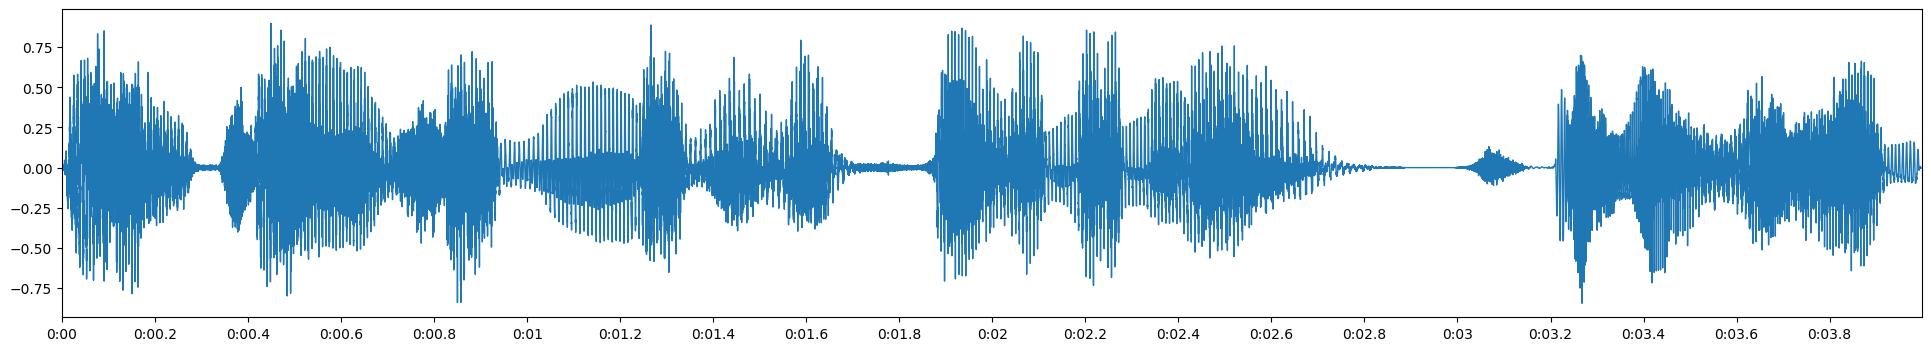

In [16]:
s.synthesize()

In [5]:
res = s.splitInTracks(maxtracks=12, maxrange=40, noisetracks=3, distribution=2, minbreakpoints=2)
sp2 = pt.Spectrum(res.partials())
print(sp2)



Spectrum(numpartials=225, start=0.008, end=3.996)


Sample(dur=3.996281179138322, sr=44100, ch=1)
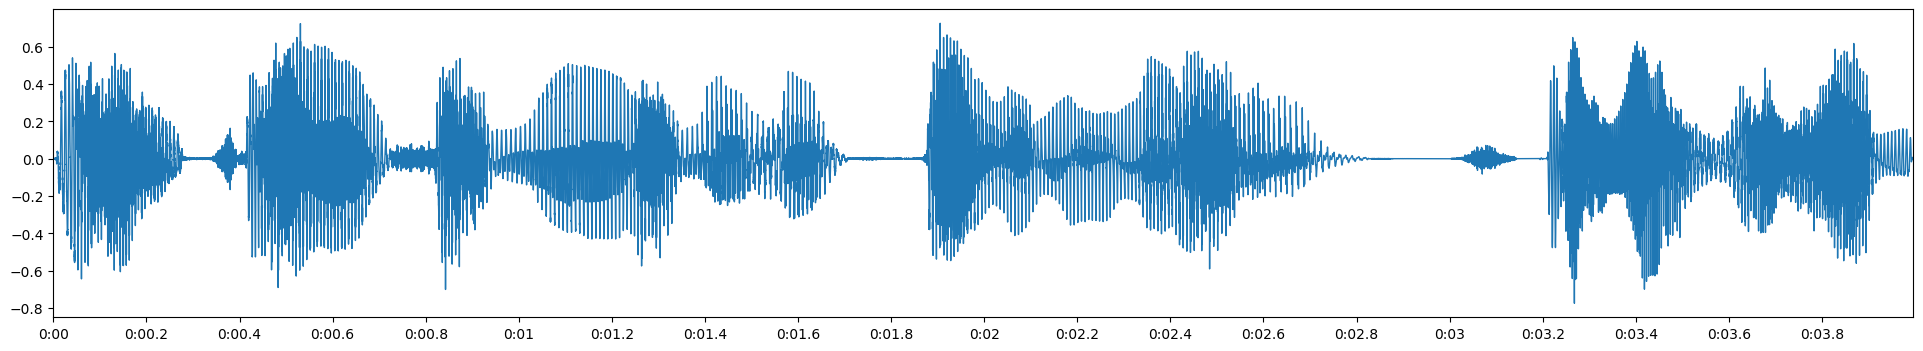

In [21]:
sp2.synthesize()

In [6]:
options = trsp.TranscribeOptions(addGliss=False, addSlurs=False, simplify=0.2)

cfg = CoreConfig()
cfg['quant.complexity'] = 'low'
cfg['show.centsDeviationAsTextAnnotation'] = False
cfg.activate()

In [7]:
sco = trsp.transcribeTracks(res.tracks, res.noisetracks, options=options)
r = sco.quantizedScore()

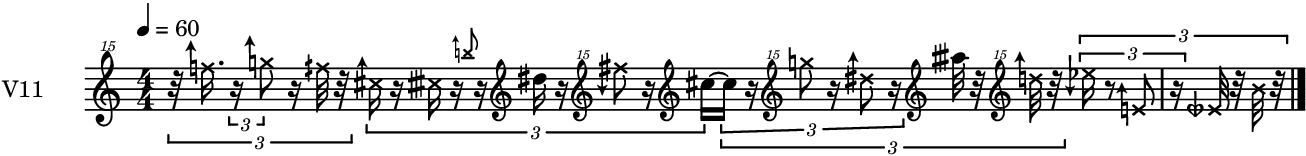

In [8]:
p0 = r.parts[0]
p0.show()

In [9]:
m0 = p0.measures[0]
m0.tree.dump()

Node ratio: 1/1, offset=0, end=4, dur=4
  Node ratio: 3/2, offset=0, end=1, dur=1
    Node ratio: 1/1, offset=0, end=1/3, dur=1/3
      «rest 0:0.083 1/12♩ 3/2»
      «7F+36 0.083:0.333 1/4♩ 3/2 noteheads=['0:cross'] attachments=[Clef(kind=treble15)]
        properties={'clef': 'treble15'}»
    Node ratio: 3/2, offset=1/3, end=2/3, dur=1/3
      «rest 0.333:0.444 1/9♩ 3/2,3/2»
      «7G+17 0.444:0.667 2/9♩ 3/2,3/2 noteheads=['0:cross']»
    Node ratio: 1/1, offset=2/3, end=1, dur=1/3
      «rest 0.667:0.833 1/6♩ 3/2»
      «7F#-42 0.833:0.917 1/12♩ 3/2 noteheads=['0:cross']»
      «rest 0.917:1 1/12♩ 3/2»
  Node ratio: 3/2, offset=1, end=2, dur=1
    Node ratio: 3/2, offset=1, end=2, dur=1
      «7C#+24 1:1.111 1/9♩ 3/2,3/2 noteheads=['0:cross']»
      «rest 1.111:1.222 1/9♩ 3/2,3/2»
      «7C#+39 1.222:1.333 1/9♩ 3/2,3/2 noteheads=['0:cross']»
      «rest 1.333:1.444 1/9♩ 3/2,3/2»
      «7B+21 1.444:grace 3/2,3/2 noteheads=['0:cross'] properties={'.snappedGracenote': True,
        'or

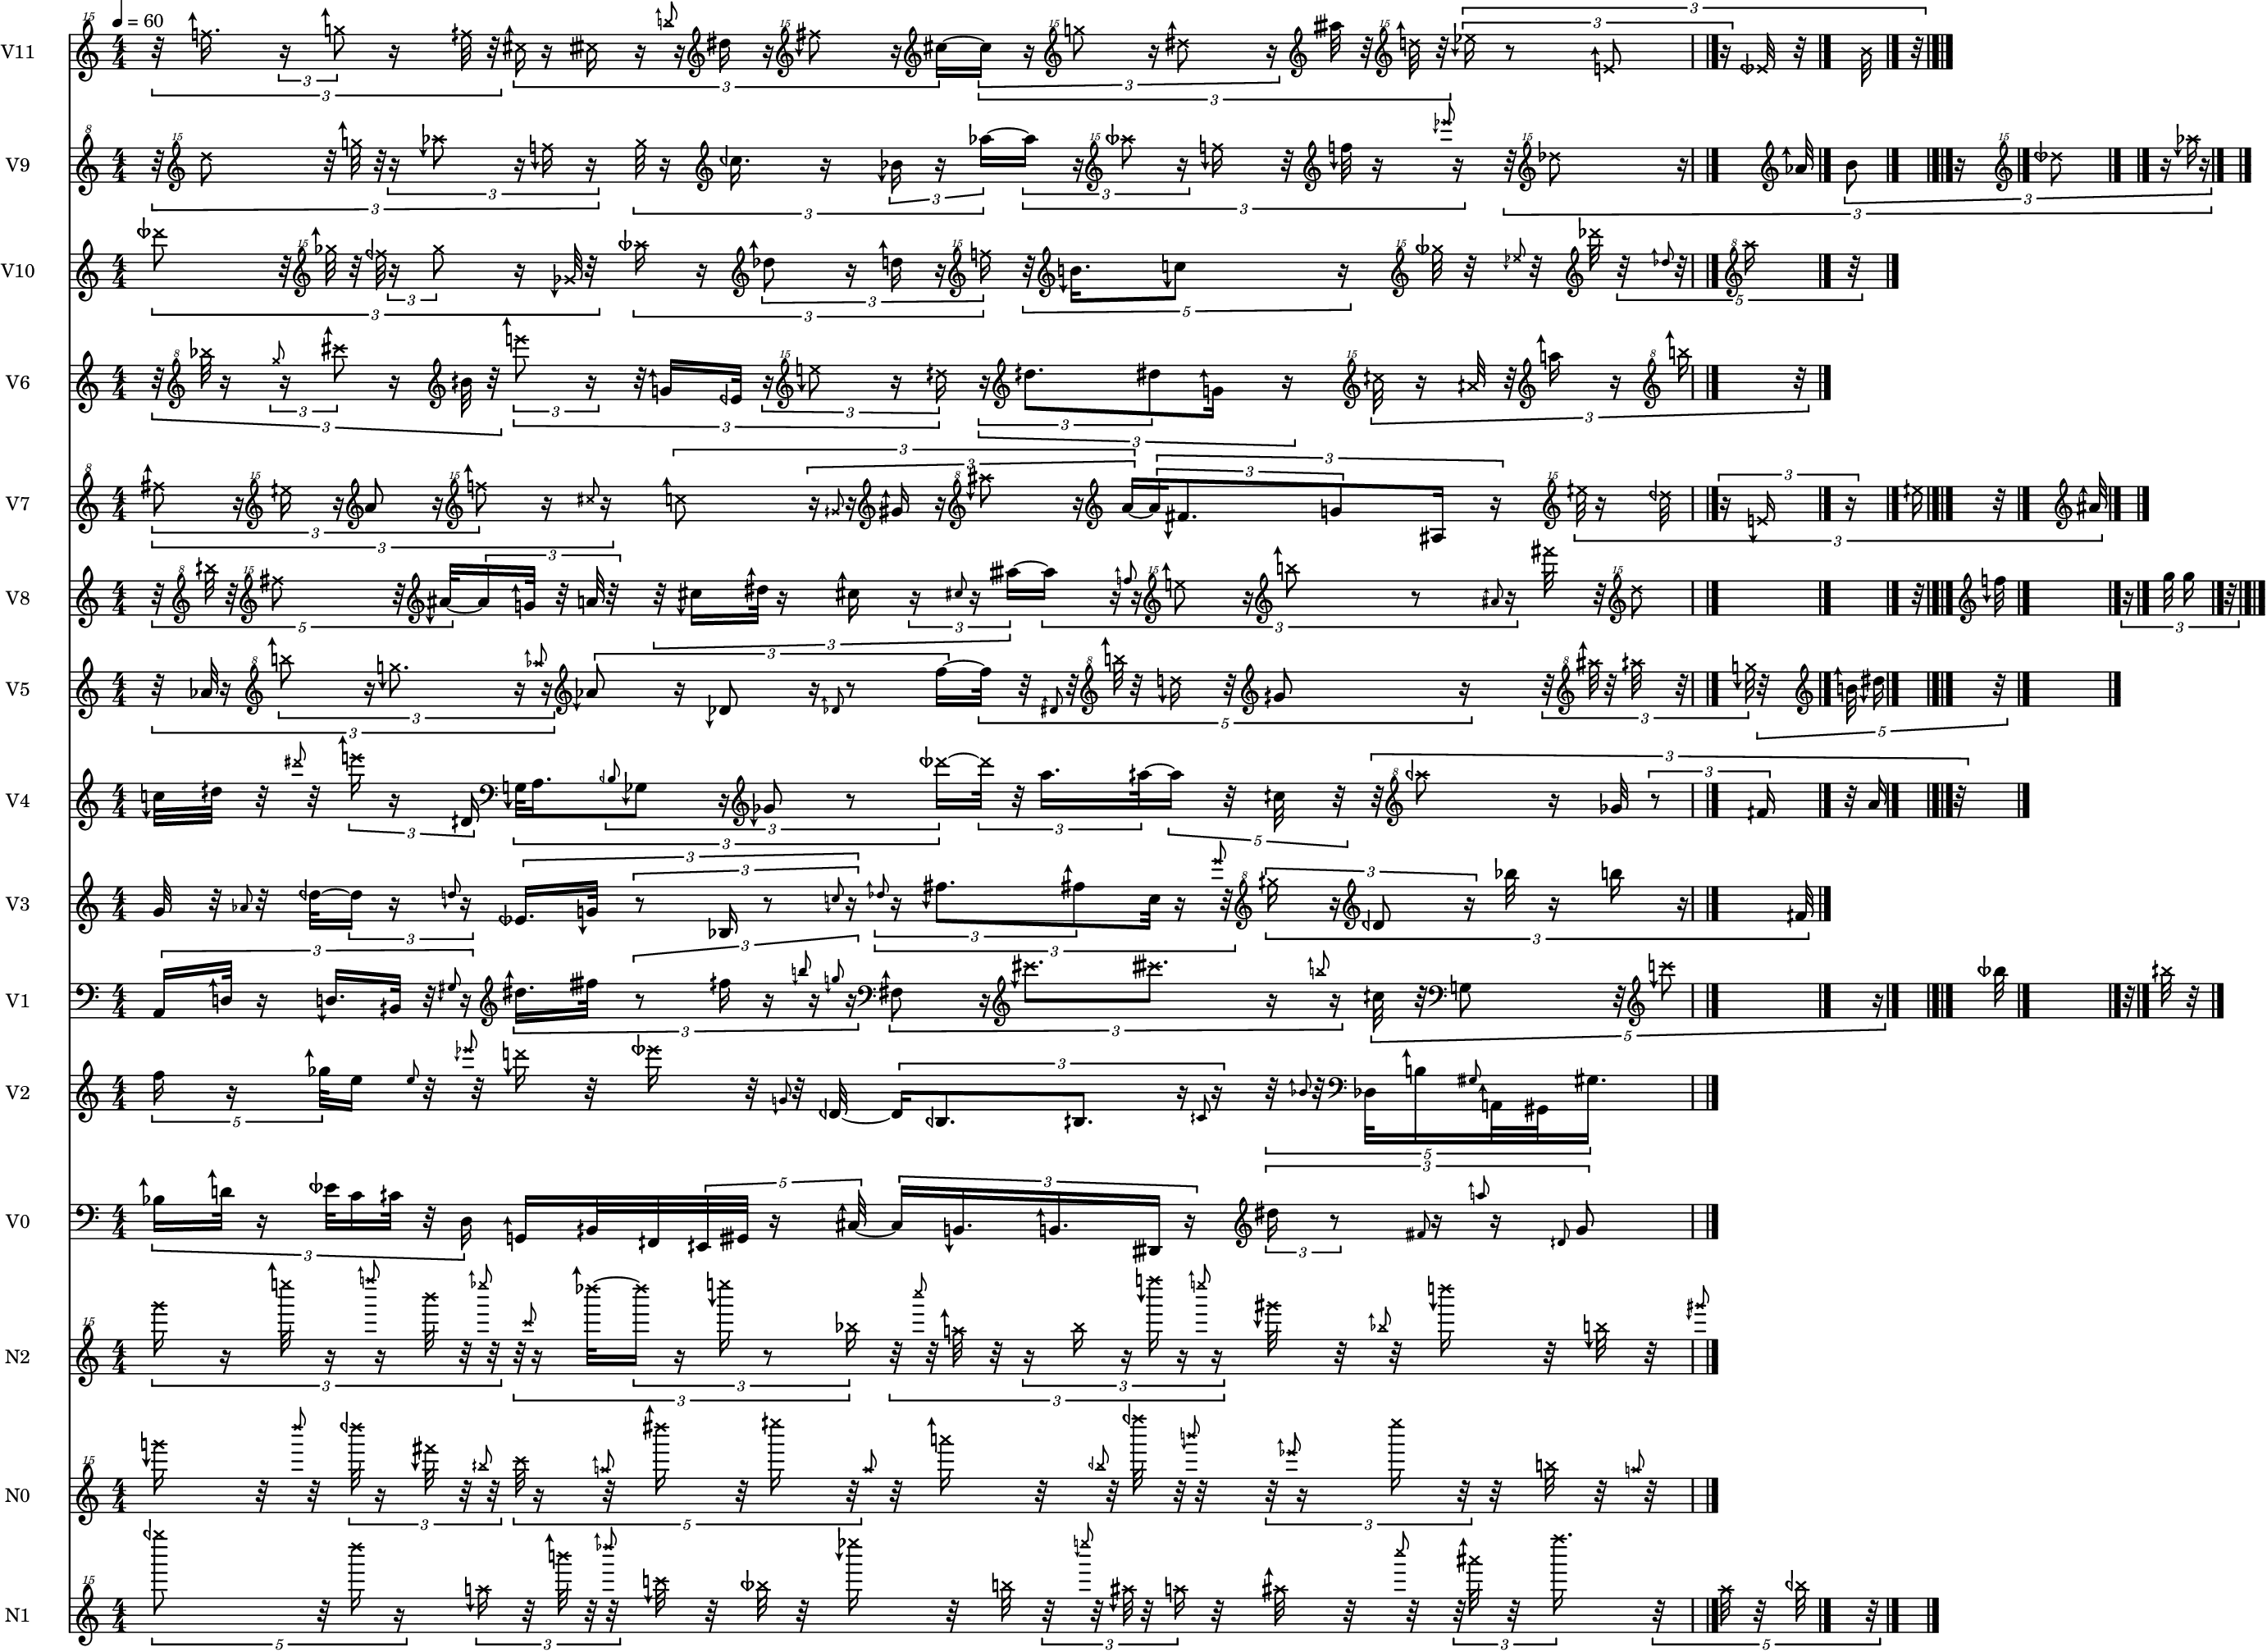

In [17]:

cfg.activate()
sco.show()
sco.write('~/tmp/trascription.ly')